In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from skimage import io

In [144]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(10,7))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [174]:
# Plot Comparison
def plot_comparison(original, filtered, title_filtered, title_original="original"):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10), sharex=True, sharey=True)

  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title(title_original)
  ax1.axis("off")

  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis("off")

### IMAGE 1

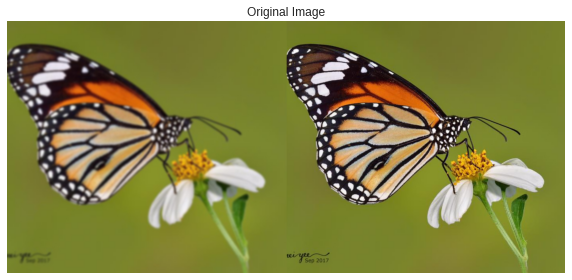

In [145]:
image = io.imread("https://raw.githubusercontent.com/Naimul-Islam-Siam/Image-Processing/master/img/sample.jpg")
show_image(image, "Original Image")

### IMAGE 2

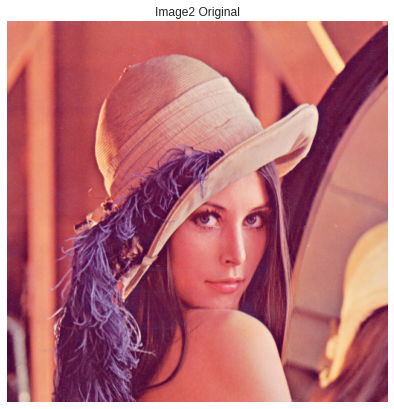

In [172]:
image2 = io.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")

show_image(image2, "Image2 Original")

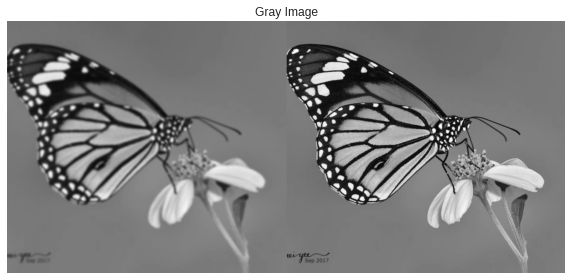

In [146]:
from skimage import color
image = color.rgb2gray(image)

show_image(image, "Gray Image")

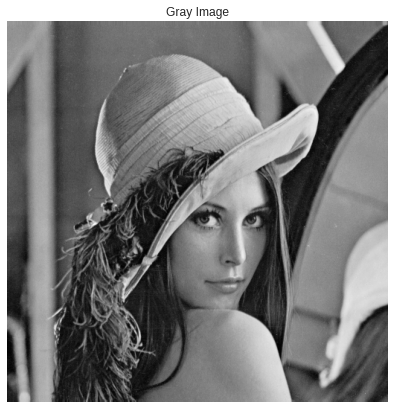

In [173]:
image2 = color.rgb2gray(image2)

show_image(image2, "Gray Image")

# Spatial Domain

### Convolution Operation

In [147]:
def convolve2d(image, kernel):
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

# Smoothing

### Average Masking

In [148]:
average_filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
average_filter = average_filter / 9

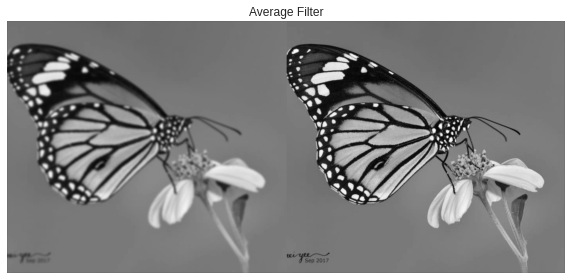

In [150]:
average_image = convolve2d(image, average_filter)

show_image(average_image, "Average Filter")

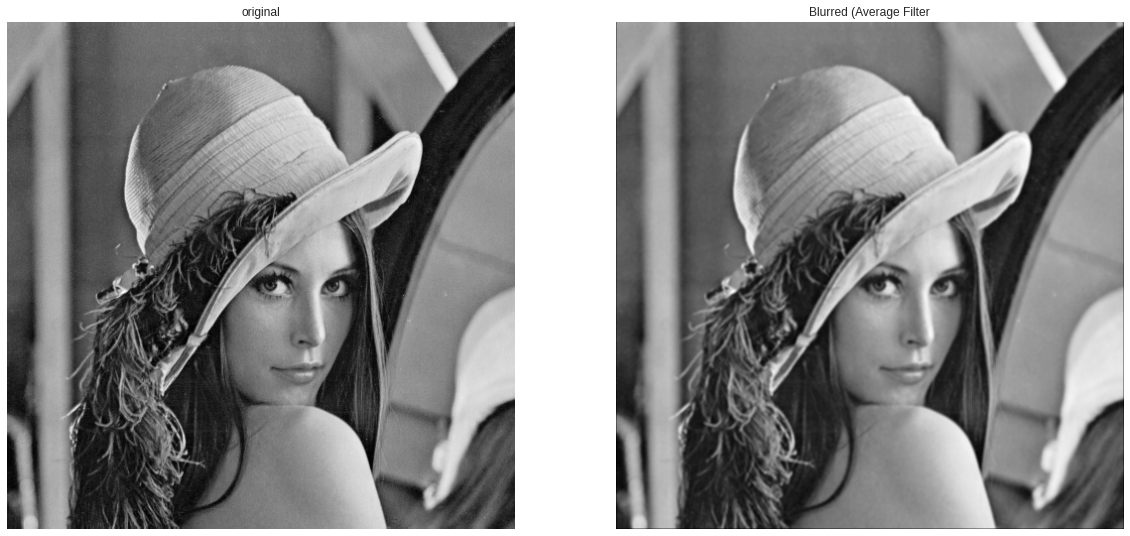

In [176]:
average_image2 = convolve2d(image2, average_filter)

plot_comparison(image2, average_image2, "Blurred (Average Filter")

### Box Blur Masking

In [151]:
box_blur_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

box_blur_filter = box_blur_filter / 16

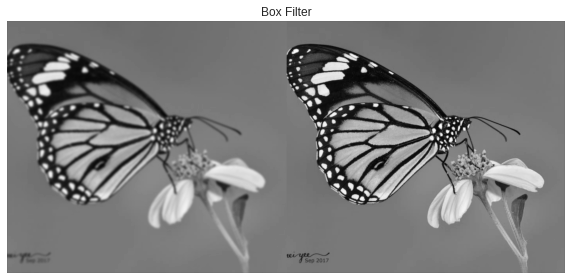

In [152]:
box_blur_image = convolve2d(image, box_blur_filter)

show_image(box_blur_image, "Box Filter")

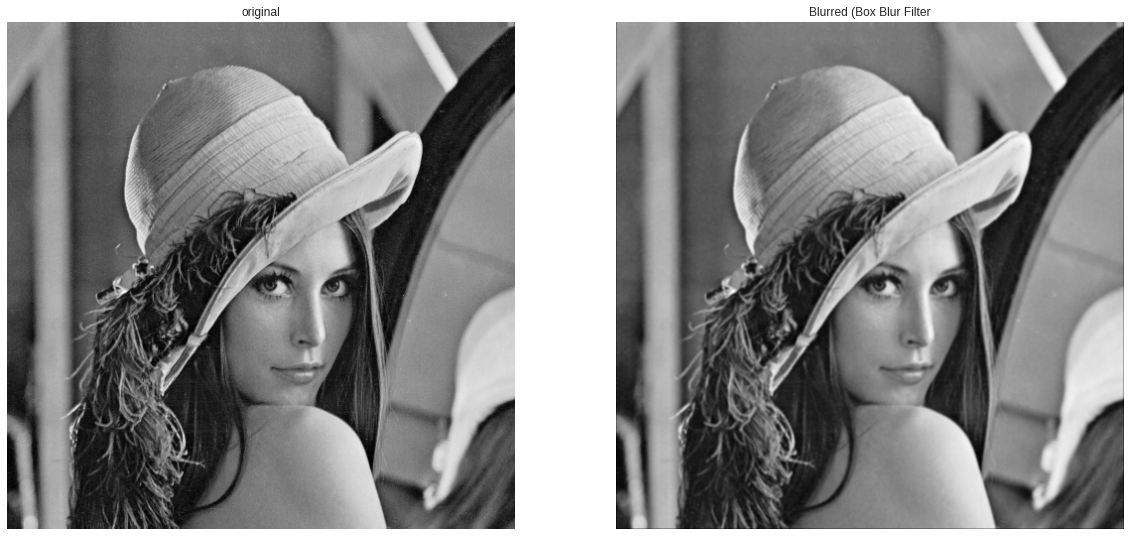

In [178]:
box_blur_image2 = convolve2d(image2, box_blur_filter)

plot_comparison(image2, box_blur_image2, "Blurred (Box Blur Filter")

### Gaussian Masking

In [153]:
gaussian_filter = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])

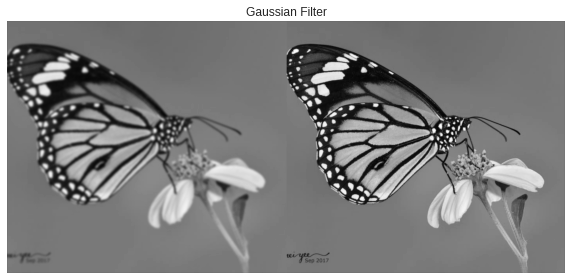

In [154]:
gaussian_image = convolve2d(image, gaussian_filter)

show_image(gaussian_image, "Gaussian Filter")

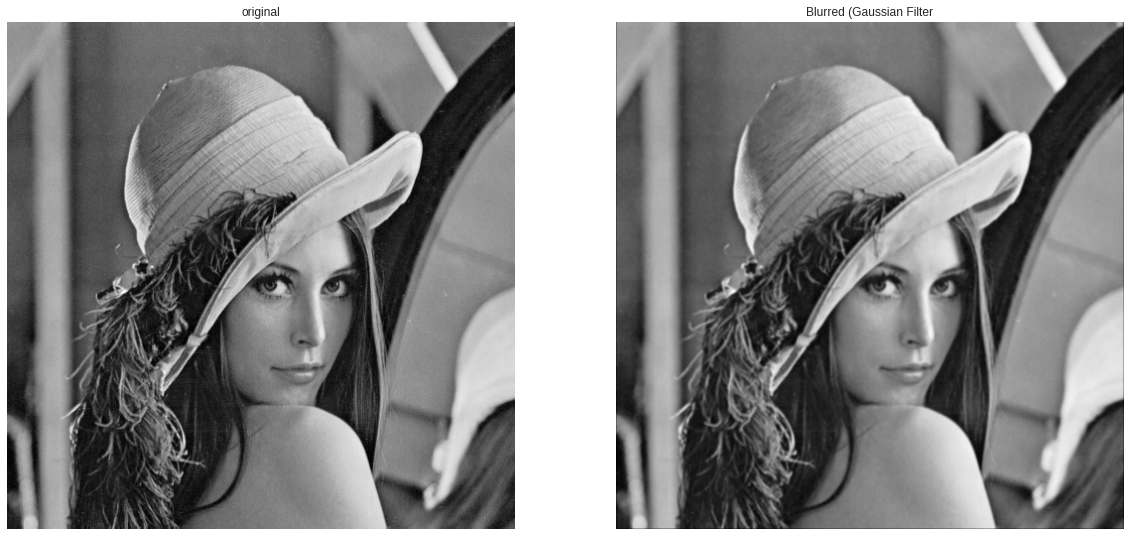

In [179]:
gaussian_image2 = convolve2d(image2, gaussian_filter)

plot_comparison(image2, gaussian_image2, "Blurred (Gaussian Filter")

# Sharpening

### Laplacian Filter

In [149]:
laplacian_filter = np.array([[0, -1/4, 0], [-1/4, 2, -1/4], [0, -1/4, 0]])

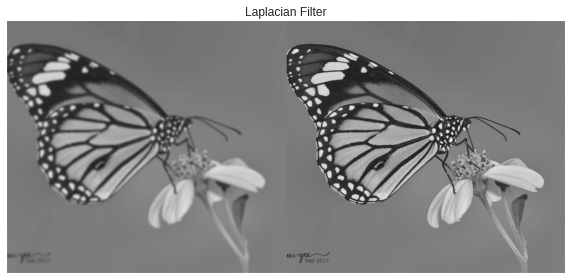

In [155]:
laplacian_image = convolve2d(image, laplacian_filter)

show_image(laplacian_image, "Laplacian Filter")

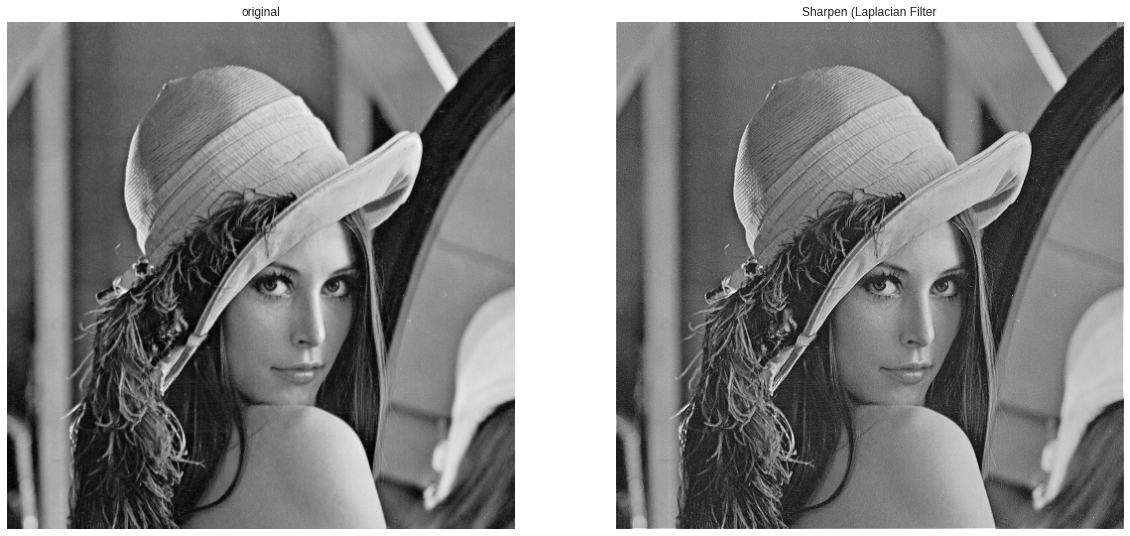

In [182]:
laplacian_image2 = convolve2d(image2, laplacian_filter)

plot_comparison(image2, laplacian_image2, "Sharpen (Laplacian Filter")

---

# Frequency Domain

### Smoothing

In [167]:
def freq_smooth(img):
  # Define masking shape
  maskingShape = img.shape

  # Define sigma constant
  sigma = 30

  # Create mask
  m, n = [(s - 1.0) / 2.0 for s in maskingShape]
  y, x = np.ogrid[-m:m+1, -n:n+1]

  # Sum
  mask = np.exp( -(x * x + y * y) / (2.0 * sigma * sigma) )
  sum_of_mask = mask.sum()

  # Divide all masks with the sum
  if sum_of_mask != 0:
      mask /= sum_of_mask

  # Find maximum and minimum mask
  mask_max, mask_min = np.amax(mask), np.amin(mask)

  gray_mask = (mask - mask_min) / (mask_max - mask_min)

  # Shift the zero-frequency component to the center of the spectrum after 
  # Computing the 2-dimensional discrete Fourier Transform
  ft_img = np.fft.fftshift(np.fft.fft2(img))

  # Now filter the image by multiplying gray mask
  filtered_multiplied_img = np.multiply(ft_img, gray_mask)

  # Computes the inverse of the 2-dimensional discrete Fourier Transform
  inv_ft_img = np.fft.ifft2(filtered_multiplied_img)

  output_image = np.abs(inv_ft_img)

  return output_image

In [168]:
freq_smooth_image = freq_smooth(image)

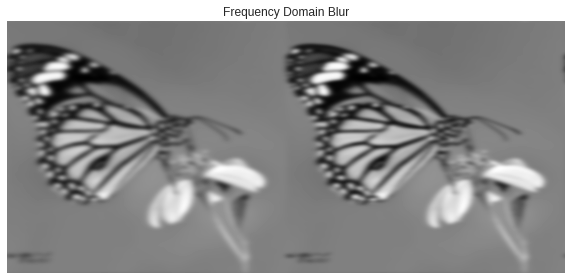

In [169]:
show_image(freq_smooth_image, "Frequency Domain Blur")

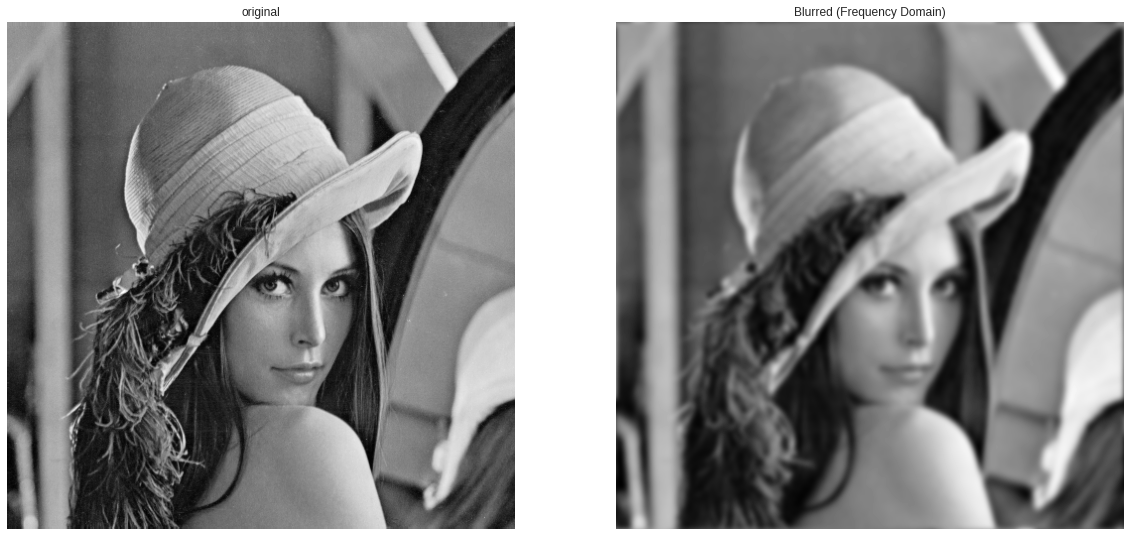

In [180]:
freq_smooth_image2 = freq_smooth(image2)

plot_comparison(image2, freq_smooth_image2, "Blurred (Frequency Domain)")

### Sharpening

In [166]:
def freq_sharp(img):
  # Define masking shapes
  maskingShape = img.shape
  m, n = maskingShape[0]/2, maskingShape[1]/2

  # Develop mask
  y, x = np.ogrid[-m:m, -n:n]
  mask = np.add(x**2, y**2) # [ Σ(x^2 + y^2) ]
  mask = - ( 4 * np.pi**2 * mask ) # [ 4 x π^2 x mask ]

  max_mask, min_mask = np.amax(mask), np.amin(mask)
  mask = (mask - max_mask) / (max_mask - min_mask)

  # Shift the zero-frequency component to the center of the spectrum after 
  # Computing the 2-dimensional discrete Fourier Transform
  ft_img = np.fft.fftshift(np.fft.fft2(img))

  # Now filter the image by multiplying gray mask
  ft_img = np.multiply(ft_img, mask)

  # Computes the inverse of the 2-dimensional discrete Fourier Transform
  inv_ft_img = np.fft.ifft2(ft_img)

  # Take absolute values of inverted fourier transformed values and divide all
  # values by maximum values to detect sharpen edges
  sharpen_img = np.abs(inv_ft_img)
  max_value = np.amax(sharpen_img)
  sharpen_img = sharpen_img / max_value

  # Sum with original image
  output = img + sharpen_img

  return output

### Sharpening Original Image

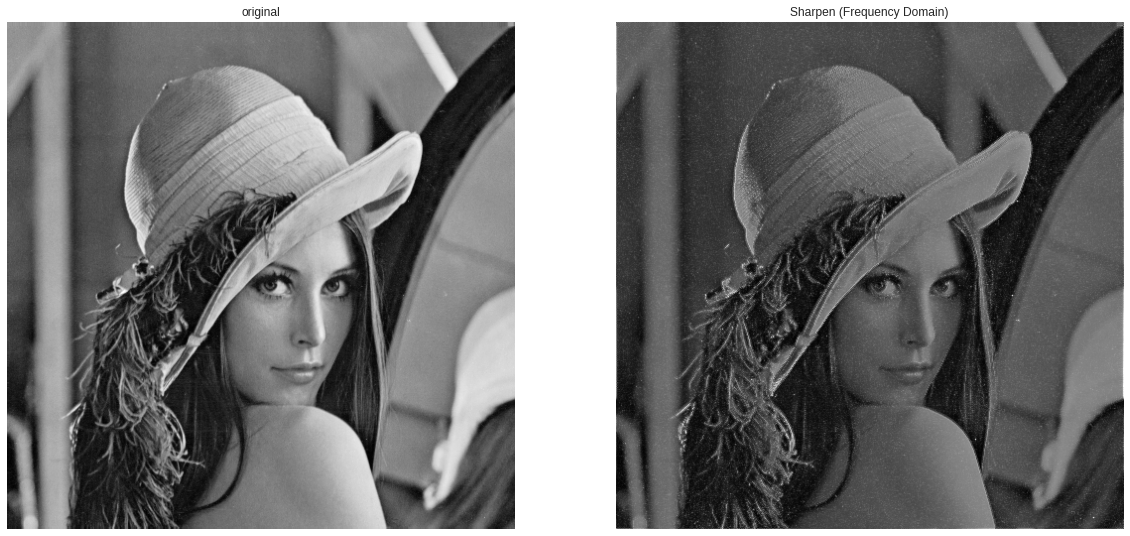

In [183]:
freq_sharp_image2 = freq_sharp(image2)

plot_comparison(image2, freq_sharp_image2, "Sharpen (Frequency Domain)")

### Sharpening Previously Blurred Image

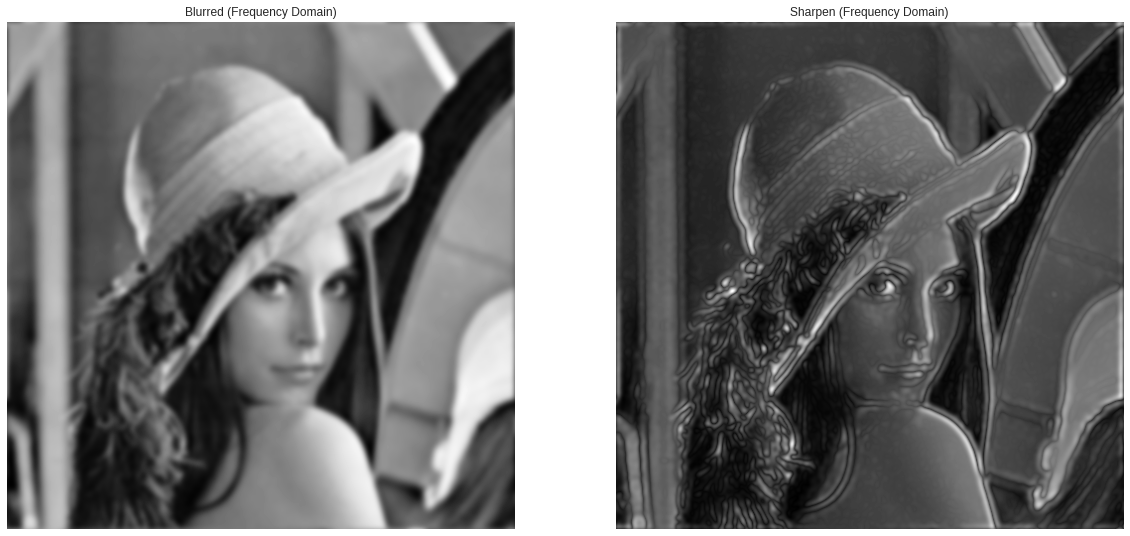

In [184]:
freq_sharp_image2 = freq_sharp(freq_smooth_image2)

plot_comparison(freq_smooth_image2, freq_sharp_image2, "Sharpen (Frequency Domain)", "Blurred (Frequency Domain)")

---